# wetlabtools
Examples on how to use wetlabtools

In [2]:
import wetlabtools

Loading BokehJS ...

## CD data
Let's plot some CD data. Since the ProData data structure is horrible, we first have to process the data. If you provide a path to a csv file with the buffer baseline, it will return the baseline-corrected CD data. Currently only temperature melts are supported!

/Users/goldbach/git/wetlabtools/wetlabtools/plot/CD.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


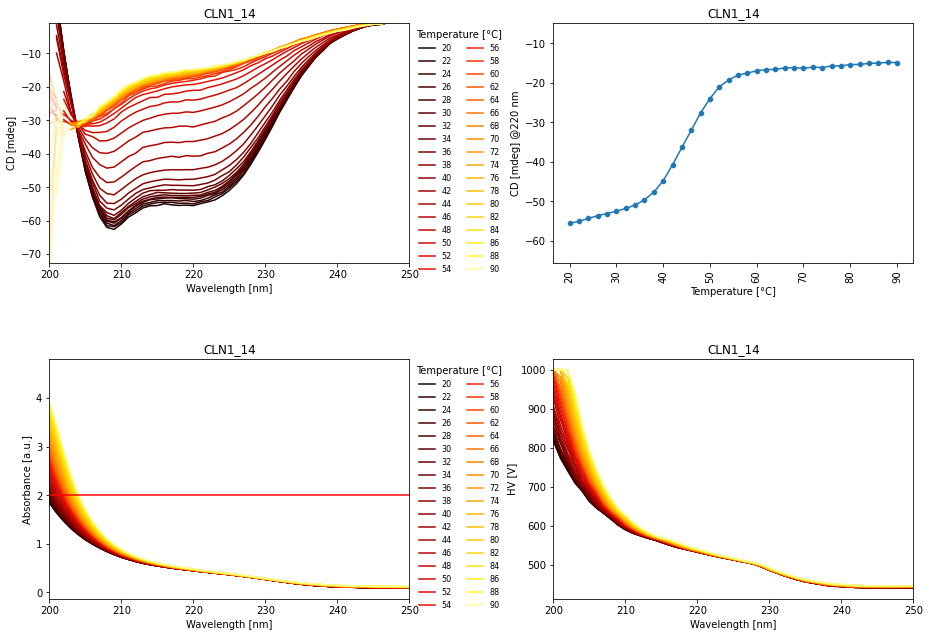

In [2]:
CD_data = 'example_data/cd/CLN1_1400009.csv'
buffer = 'example_data/cd/buffer00008.csv'

# process CD data
data = wetlabtools.plot.load_CD_data(data_csv=CD_data,
                                buffer_csv=buffer)

# now we can plot the data. It will automatically plot all samples
fig = wetlabtools.plot.cd(data=data,
                    zooms=[False],
                    out_path='',
                    cutoff=2.0,
                    mode='fade',
                    min_x=200,
                    max_x=250,
                    save_pdf=False,
                    save_png=False
                   )

## SEC-MALS
You can provide a path to the directory containing all csv files that you want to plot. The function will automatically find all csv files and plot the SEC-MALS data. If you wish to save plots, these will be saved to the same location as the input file.

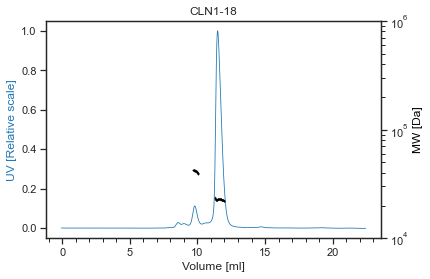

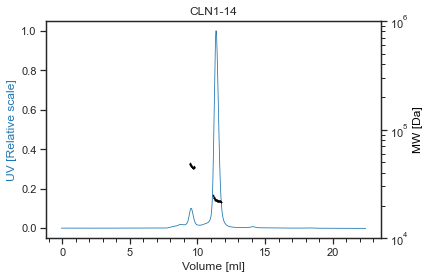

In [ ]:
sec_mals = 'example_data/sec_mals'

wetlabtools.plot.secmals(path=sec_mals,
                      flow_rate=0.5,
                      min_x=0,
                      max_x=999,
                      save_pdf=False,
                      save_png=False
                     )

## FPLC data
### Interactive FPLC plot
You can use the package to plot your SEC or IMAC runs interactively. To do so, export the fplc data from Unicorn (Äkta software) as csv file: open the chromatogram in the evaluation software and click export data in the top toolbar. You can zoom and pan the plot and download the current view as a picture. Click the legend entries if you like to hide data from the plot. You can adjust the plot size using the height and width parameters.

In [ ]:
imac_data = 'example_data/fplc/imac.csv'

wetlabtools.plot.interactive_fplc(csv_path=imac_data,
                                  height=400,
                                  width=600
                                 )

## SPR data
Data from SPR experiments can easily be plotted after exporting the data to a txt file from the Biacore Insight software. Ligand concentrations are expected to be in µM. You can plot the kinetics (sensorgram) simply by providing the path to the txt file:

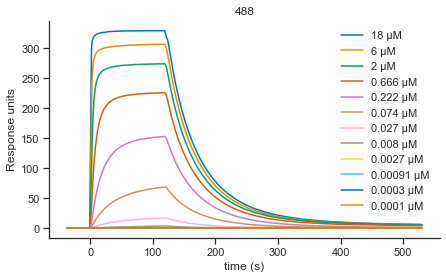

In [ ]:
kinetics = 'example_data/spr/kinetics.txt'
wetlabtools.plot.spr_kinetics(file=kinetics,
                              save_fig=False,
                              height=4,
                              width=7
                             )

Steady-state affinity data can be plotted after loading the data. You can also load the fit created in the Biacore Insight software and plot it overlayed to the measured data points.

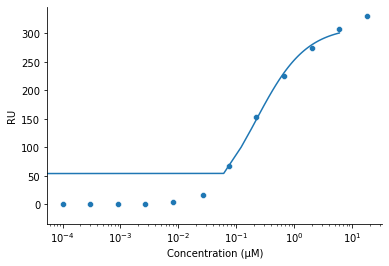

In [4]:
affinity = 'example_data/spr/sample-1_affinity.txt'

# load the affinity data
affinity_data = wetlabtools.plot.load_affinity_data(affinity)

# load the automatic fit
biacore_fit = wetlabtools.plot.load_affinity_fit(affinity)

# plot the data points and the fit
fig = wetlabtools.plot.spr_affinity(measured=affinity_data,
                                    fitted=biacore_fit,
                                    log=True,
                                    save_fig=False,
                                    height=4,
                                    width=6
                                    )

Since sometimes the fit from the Biacore software is not nice and also not clear what's actually going on under the hood, some people prefer manually fitting a sigmoid function. Wetlabtools has a function to automatically fit the following [sigmoid function](https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_dr_stim_variable_2.htm) to the experimental data:
$$f(x)=\dfrac{x^{slope}*(max-min)}{x^{slope}+Kd^{slope}}$$

Kd: 284.16 nM


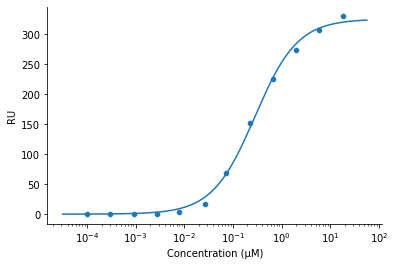

In [6]:
affinity = 'example_data/spr/sample-1_affinity.txt'

# load the affinity data
affinity_data = wetlabtools.plot.load_affinity_data(affinity)

# load the automatic fit
sig_fit, Kd = wetlabtools.plot.fit_sigmoid_function(data=affinity_data,
                                                mock_scale='log'
                                               )
print(f'Kd: {round(Kd * 1_000, 2)} nM')

# plot the data points and the fit
fig = wetlabtools.plot.spr_affinity(measured=affinity_data,
                                    fitted=sig_fit,
                                    log=True,
                                    save_fig=False,
                                    height=4,
                                    width=6
                                    )

You can plot multiple curves automatically and plot the data to the same plot. The function assumes the files are named as the following: sample-name_affinity.txt

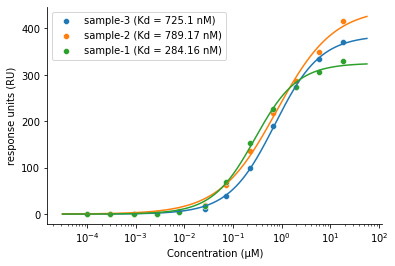

In [3]:
data = 'example_data/spr'
fig = wetlabtools.plot.multi_affinity(data)